In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"
import os
import cv2
import time
import random
import shutil
import numpy as np
import matplotlib.pyplot as plt
from keras.models import model_from_json
from utils_gen import gen_paths_img_dm, gen_var_from_paths, gen_density_map_gaussian
from utils_imgproc import norm_by_imagenet

Using TensorFlow backend.


In [2]:
from CSRNet import CSRNet

In [3]:
model = CSRNet(input_shape=(None, None, 3))
model.load_weights('./weights/model.hdf5')

In [4]:
img = norm_by_imagenet(cv2.cvtColor(cv2.imread('./1.jpg'), cv2.COLOR_BGR2RGB).astype(np.float32))

In [5]:
heat_map = model.predict(np.expand_dims(img,0))

In [6]:
np.sum(heat_map)

15.515809

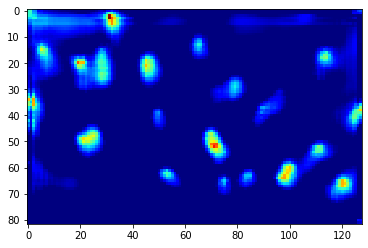

In [7]:
plt.imshow(heat_map[0,:,:,0], cmap=plt.cm.jet)

In [8]:
plt.imsave('1_out.jpg', heat_map[0,:,:,0], cmap=plt.cm.jet)